# Overview

Analysis of several widely available movie ratings sources finds that there are key genres and original languages that Microsoft should produce movies in to achieve higher box office results

- Movies that have higher average ratings have a higher average box office value.
- The most highly rated movie genres are Biographies, Documentaries, History and Music.
- Movies have different average ratings based on the original language that they were produced in. Microsoft should avoid producing movies in Russian explore producing movies in Japanese. 


# Business Overview

- Microsoft would like to open a movie production studio but they have no internal experience in producing movies.
- Explore 11 datasets gathered from 5 different sources to find actionable insights for the newly created Microsoft production team.
- Focus on the different types of movies that team should focus on producing. 


# Data Undertanding

Merge different data sets from the same sources based on ID fields to find more complete data sets. In this case, we'll use datasets from Rotten Tomatoes, IMDB and The Movie Database.

In [35]:
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Rotten Tomatoes Sheets

Load the data shees from Rotten Tomatoes. Both sheets include an ID that I can match on to see if movie ratings are an indicator of results at the box office. 

In [36]:
#add the two rotten tomatoes data sheets into jupiter notebook and explore how we can merge them

rt_movie_info = pd.read_csv('rt.movie_info.tsv', sep='\t')
#assign negative and postive 1 values to the fresh column so that i can use group by and sum to gather overall rating
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t')
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [37]:
# assume that I can group the ID's and summarize the fresh vs rotten values in the fresh column to yield 
# an overall picture of each movie's rating
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [38]:


#assign negative and postive 1 values to the fresh column so that i can use group by and sum to gather overall rating
# add a new column for overall rating
rt_reviews['fresh'] = rt_reviews['fresh'].map(lambda x: 1 if x == 'fresh' else -1)
rt_reviews = rt_reviews.groupby(['id']).sum()

In [39]:
rt_reviews['Overall Fresh'] = rt_reviews['fresh'].apply(lambda x: 'fresh' if x >=0 else 'rotten')


In [40]:
#merge the movie info table with the rating table 
rt_movie_ratings = rt_movie_info.merge(rt_reviews, on='id', how='left')
rt_movie_ratings.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,fresh,top_critic,Overall Fresh
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,NaN,NaN,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,43.0,34.0,fresh
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,13.0,5.0,fresh
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,7.0,19.0,fresh
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,NaN,NaN,NaN


In [41]:
# drop movies that don't have a theater date at all, then create a new column with just the year and filter 
# for movies that had theater dates in the last 10 years
# drop movies that don't have box office results

rt_movie_ratings.dropna(subset = ['theater_date'], inplace=True)
rt_movie_ratings['Theater Year'] = rt_movie_ratings['theater_date'].map(lambda x: int(x[-4:]))
rt_movie_ratings = rt_movie_ratings[rt_movie_ratings['Theater Year'] >= 2011]
rt_movie_ratings.dropna(subset = ['box_office'], inplace=True)

In [42]:
# confirm that the only currency for box office is in dollars

rt_movie_ratings['currency'].value_counts()

$    113
Name: currency, dtype: int64

In [43]:
# create a new column for box office values as an integer so that we can apply math functions 
rt_movie_ratings['int_box_office'] = rt_movie_ratings['box_office'].apply(lambda x: int(x.replace(',','')))

In [44]:
# set y values for average of movies with fresh vs rotten ratings
y_fresh = int(rt_movie_ratings[rt_movie_ratings['Overall Fresh'] == 'fresh']['int_box_office'].mean())
y_rotten = int(rt_movie_ratings[rt_movie_ratings['Overall Fresh'] == 'rotten']['int_box_office'].mean())

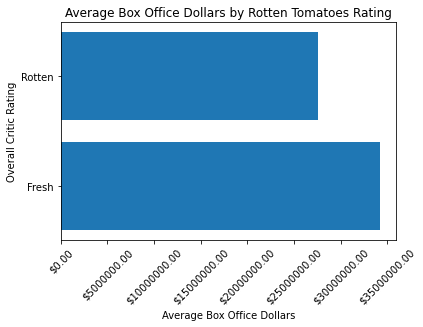

In [45]:
# plot the graph and convert the int_box_office values to currency for better visualization

fig, ax = plt.subplots(figsize=(6, 4))

y = [y_fresh, y_rotten]
x = ['Fresh','Rotten']
plt.xticks(rotation = 45)

ax.xaxis.set_major_formatter('${x:1.2f}')
ax.xaxis.set_tick_params(which='major', labelcolor='black',
                         labelleft=True, labelright=False)
ax.barh(x,y)
plt.xlabel('Average Box Office Dollars')
plt.ylabel('Overall Critic Rating')
plt.title('Average Box Office Dollars by Rotten Tomatoes Rating')
plt.show()


<AxesSubplot:xlabel='Overall Fresh', ylabel='int_box_office'>

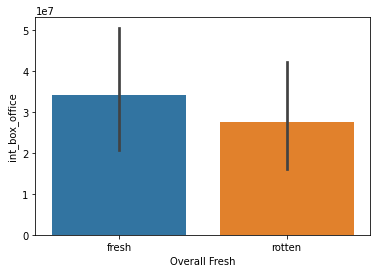

In [46]:
import seaborn as sns
rt_movie_ratings

sns.barplot(data = rt_movie_ratings, x='Overall Fresh', y = 'int_box_office')

### Average Box Office Dollars by Rating Analysis

On average, movies with 'Fresh' ratings have better results at the box office than those with 'Rotten' ratings.

## Load IMDB Data Sets

Both sheets include an ID that I can match on to see if different genres have higher ratings, and thusly higher returns at the box office. 

In [47]:
#loading IMDB data set for ratings
imdb_ratings = pd.read_csv('imdb.title.ratings.csv.gz', sep='\t', encoding='latin1')
imdb_title_basic = pd.read_csv('imdb.title.basics.csv')

In [48]:
# data looks super messy, let's clean it up
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 1 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   tconst,"averagerating","numvotes"  73856 non-null  object
dtypes: object(1)
memory usage: 577.1+ KB


In [49]:
# used a for loop to take the unstructured data and make it into a list of lists to easily convert to a new dataframe

all_tconst = []

for i in range(len(imdb_ratings)): 
    tconst = imdb_ratings['tconst,"averagerating","numvotes"'][i].split(',')
    all_tconst.append(tconst)


In [50]:
# created a new dataframe, noticed all the quotes
# used lambda functions to remove quotes and create data types that are not object

imdb_ratings_cleaned = pd.DataFrame(all_tconst, columns = ['tconst','Average Rating','Number of Votes'])
imdb_ratings_cleaned['Average Rating'] = imdb_ratings_cleaned['Average Rating'].map(lambda x: float(x.replace('"','')))
imdb_ratings_cleaned['Number of Votes'] =imdb_ratings_cleaned['Number of Votes'].map(lambda x: int(x.replace('"','')))
imdb_ratings_cleaned.head()

,tconst,Average Rating,Number of Votes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [51]:
imdb_title_basic.head()

# I can use the 'tconst' ID to match the two tables, and I'll have to separate the 'genres' to find the genres
# that yield the highest ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [52]:
# merge imdb_title_basic and imdb_ratings_cleaned together
# i want imdb_title_basic to be the left table and to merge any matching values from
# the right table imdb_ratings_cleaned based on the tconst id to populate as well

imdb_title_ratings = imdb_title_basic.merge(imdb_ratings_cleaned, on='tconst', how='left')
imdb_title_ratings.shape

(146144, 8)

In [53]:

# pull out generes to isolate them

clean_genres = imdb_title_ratings[['tconst','genres']]
clean_genres.dropna(inplace=True)
clean_genres

<ipython-input-53-1841d1d17ef5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_genres.dropna(inplace=True)


,tconst,genres
0,tt0063540,"Action,Crime,Drama"
1,tt0066787,"Biography,Drama"
2,tt0069049,Drama
3,tt0069204,"Comedy,Drama"
4,tt0100275,"Comedy,Drama,Fantasy"
...,...,...
146138,tt9916428,"Adventure,History,War"
146139,tt9916538,Drama
146140,tt9916622,Documentary
146141,tt9916706,Comedy


In [54]:
# isolate the genres and create a list of them

genre_dct_lst = clean_genres['genres'].map(lambda x: {g:1 for g in x.split(',')}).tolist()
genre_df = pd.DataFrame(genre_dct_lst).fillna(0).astype(int)


genre_list = list(genre_df.columns)
genre_list

['Action',
 'Crime',
 'Drama',
 'Biography',
 'Comedy',
 'Fantasy',
 'Horror',
 'Thriller',
 'Adventure',
 'Animation',
 'Documentary',
 'History',
 'Mystery',
 'Sci-Fi',
 'Romance',
 'Family',
 'War',
 'Music',
 'Sport',
 'Western',
 'Musical',
 'Adult',
 'News',
 'Talk-Show',
 'Reality-TV',
 'Game-Show',
 'Short']

In [55]:
# The combined df
genres_combined = pd.concat([clean_genres.reset_index(drop=True), genre_df], axis=1)
genres_combined

,tconst,genres,Action,Crime,Drama,Biography,Comedy,Fantasy,Horror,Thriller,...,Music,Sport,Western,Musical,Adult,News,Talk-Show,Reality-TV,Game-Show,Short
0,tt0063540,"Action,Crime,Drama",1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,"Biography,Drama",0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,Drama,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,"Comedy,Drama",0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,"Comedy,Drama,Fantasy",0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140731,tt9916428,"Adventure,History,War",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140732,tt9916538,Drama,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140733,tt9916622,Documentary,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140734,tt9916706,Comedy,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


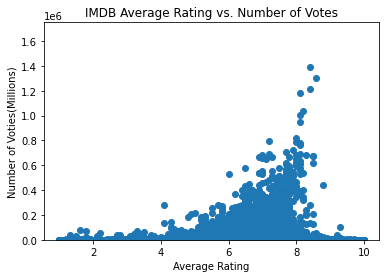

In [56]:
# combine the genres_combined table with imdb titles and ratings so that we can isolate the most highly rated genres

imdb_title_ratings_genres = imdb_title_ratings.merge(genres_combined, on='tconst', how='left' )

# let's see if more votes is correlated with a higher rating, re ran this with clean data set 

import numpy as np
import matplotlib.pyplot as plt

x = imdb_title_ratings_genres['Average Rating']
y = imdb_title_ratings_genres['Number of Votes']

plt.ylim(0,1750000)
plt.xlabel('Average Rating')
plt.ylabel('Number of Voties(Millions)')
plt.title('IMDB Average Rating vs. Number of Votes')
plt.scatter(x,y)
plt.show()

# looks like there is a relationship between having more ratings and having a higher average rating. 
# it also looks like there's a lot of ratings that have a very low number of votes, i'm probably going to eliminate those 
# since i'm not really concerned with what only a few people thought




In [57]:
imdb_title_ratings_genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres_x,Average Rating,Number of Votes,genres_y,Action,...,Music,Sport,Western,Musical,Adult,News,Talk-Show,Reality-TV,Game-Show,Short
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,"Action,Crime,Drama",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,"Biography,Drama",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,"Comedy,Drama",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"Comedy,Drama,Fantasy",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,Documentary,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,Comedy,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# drop null values 

imdb_title_ratings_genres.dropna(subset = ['genres_x'], inplace=True)

<ipython-input-77-e262a3c24e1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_title_ratings_genres.dropna(subset = ['genres_x'], inplace=True)


In [78]:
imdb_title_ratings_genres['Genres'] = imdb_title_ratings_genres['genres_x'].map(lambda x: x.split(','))
imdb_title_ratings_genres

<ipython-input-78-775e2d6b3122>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_title_ratings_genres['Genres'] = imdb_title_ratings_genres['genres_x'].map(lambda x: x.split(','))


,tconst,primary_title,original_title,start_year,runtime_minutes,genres_x,Average Rating,Number of Votes,genres_y,Action,...,Sport,Western,Musical,Adult,News,Talk-Show,Reality-TV,Game-Show,Short,Genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,"Action,Crime,Drama",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,"Biography,Drama",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[Drama]
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"Comedy,Drama,Fantasy",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Comedy, Drama, Fantasy]"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0,"Adventure,Animation,Comedy",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Adventure, Animation, Comedy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146113,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365.0,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[Drama]
146114,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5.0,Documentary,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[Documentary]
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6.0,Documentary,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[Documentary]
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136.0,"Drama,Family",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Drama, Family]"


In [79]:
genres_explode = imdb_title_ratings_genres.explode('Genres')

In [80]:
bad_genres = genres_explode['Genres'].value_counts().tail(6).index
genres_explode = genres_explode[~genres_explode['Genres'].isin(bad_genres)]


In [81]:
genres_explode['Genres'].value_counts()

Drama          25751
Documentary    14882
Comedy         14072
Thriller        6955
Horror          6334
Action          5670
Romance         5393
Crime           3939
Biography       3361
Adventure       3318
Family          2949
Mystery         2665
History         2443
Sci-Fi          1862
Fantasy         1789
Music           1666
Animation       1474
Sport           1015
War              713
Musical          569
Name: Genres, dtype: int64

In [82]:
mmm = genres_explode.groupby('Genres').mean()['Average Rating'].sort_values(ascending=False).head(4)
mmm

Genres
Documentary    7.319453
Biography      7.172925
Music          7.072569
History        7.056365
Name: Average Rating, dtype: float64

In [83]:
av_overall = genres_explode['Average Rating'].mean()

(5.0, 8.0)

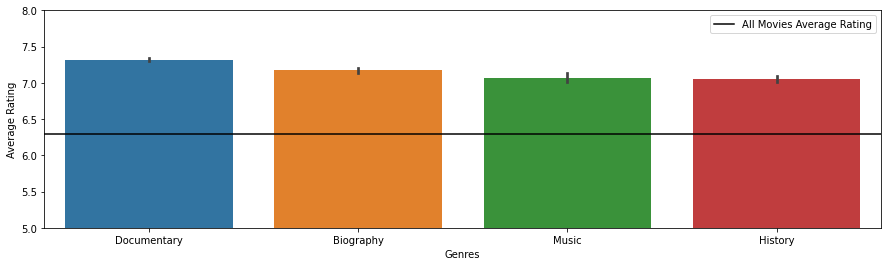

In [84]:
plt.figure(figsize = (15,4))
sns.barplot(data = genres_explode, x = 'Genres', y = 'Average Rating',
           order=mmm.index)
plt.axhline(y = av_overall, color = 'k', linestyle = '-', label='All Movies Average Rating')
plt.legend()
plt.ylim(5,8)


### Most  Analysis

The genres 'Biography, 'Documentary', 'History', and 'Music' have higher average ratings. 

In [198]:
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv')
imdb_title_basic = pd.read_csv('imdb.title.basics.csv')

imdb_title_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [199]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [217]:
info = imdb_title_basic.merge(tn_movie_budgets, how='left', left_on='original_title', right_on='movie')
info

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
146318,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN
146319,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN
146320,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,NaN,NaN,NaN,NaN
146321,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
info.dropna(subset=['movie'],inplace=True)

In [220]:
info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537 entries, 20 to 146257
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             3537 non-null   object 
 1   primary_title      3537 non-null   object 
 2   original_title     3537 non-null   object 
 3   start_year         3537 non-null   int64  
 4   runtime_minutes    3070 non-null   float64
 5   genres             3473 non-null   object 
 6   id                 3537 non-null   float64
 7   release_date       3537 non-null   object 
 8   movie              3537 non-null   object 
 9   production_budget  3537 non-null   object 
 10  domestic_gross     3537 non-null   object 
 11  worldwide_gross    3537 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 359.2+ KB


In [222]:
info.drop_duplicates(subset = 'original_title', inplace=True)

In [225]:
imdb_ratings

,"tconst,""averagerating"",""numvotes"""
0,"tt10356526,""8.3000"",""31"""
1,"tt10384606,""8.9000"",""559"""
2,"tt1042974,""6.4000"",""20"""
3,"tt1043726,""4.2000"",""50352"""
4,"tt1060240,""6.5000"",""21"""
...,...
73851,"tt9805820,""8.1000"",""25"""
73852,"tt9844256,""7.5000"",""24"""
73853,"tt9851050,""4.7000"",""14"""
73854,"tt9886934,""7.0000"",""5"""


# The Movie Database Sheet and Original Languages

Since the sheet from the movie database includes rating data (which we assume from the first exercise will lead to higher box office returns) we'll look to see if the original langauge of the movie could yield higher average ratings by language. 

In [95]:
tmdb_movies = pd.read_csv('tmdb.movies.csv')
tmdb_movies.head()
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv')

# use the movie data and tn movie budgets to merge tables on title and determine if 
# movies made in a specific language make more at the box office

In [98]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [117]:
tn_movie_budgets['movie'].value_counts()

King Kong                  3
Halloween                  3
Home                       3
The Love Letter            2
The Great Gatsby           2
                          ..
Chuck&Buck                 1
The Caveman's Valentine    1
The Gatekeepers            1
Election                   1
The White Countess         1
Name: movie, Length: 5698, dtype: int64

In [118]:
tn_movie_budgets.drop_duplicates(subset = 'movie', inplace=True)

In [119]:
#filter release dates for movies in the last 10 years

tmdb_movies['release date_2'] = tmdb_movies['release_date'].apply(lambda x: int(x[:4]))
tmdb_movies = tmdb_movies[tmdb_movies['release date_2'] >= 2011]

In [120]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23885 entries, 258 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         23885 non-null  int64  
 1   genre_ids          23885 non-null  object 
 2   id                 23885 non-null  int64  
 3   original_language  23885 non-null  object 
 4   original_title     23885 non-null  object 
 5   popularity         23885 non-null  float64
 6   release_date       23885 non-null  object 
 7   title              23885 non-null  object 
 8   vote_average       23885 non-null  float64
 9   vote_count         23885 non-null  int64  
 10  release date_2     23885 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.2+ MB


In [121]:
merged = tmdb_movies.merge(tn_movie_budgets, how='left', left_on='original_title', right_on='movie')
merged

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,release date_2,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,258,"[18, 35]",39356,en,Boy,7.759,2012-03-02,Boy,7.5,149,2012,NaN,NaN,NaN,NaN,NaN,NaN
1,289,"[35, 18]",46829,en,Barney's Version,7.357,2011-01-14,Barney's Version,7.2,210,2011,86.0,"Jan 14, 2011",Barney's Version,"$30,000,000","$7,502,560","$8,845,575"
2,386,[18],54602,en,Skateland,5.938,2011-05-13,Skateland,5.4,16,2011,NaN,NaN,NaN,NaN,NaN,NaN
3,409,"[28, 18, 53]",56812,es,Balada triste de trompeta,5.552,2011-08-19,The Last Circus,6.7,177,2011,NaN,NaN,NaN,NaN,NaN,NaN
4,470,"[53, 18, 10749, 80]",47261,es,Carancho,4.554,2011-02-11,Carancho,6.6,59,2011,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23880,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,NaN,NaN,NaN,NaN,NaN,NaN
23881,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,NaN,NaN,NaN,NaN,NaN,NaN
23882,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018,NaN,NaN,NaN,NaN,NaN,NaN
23883,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
merged.drop_duplicates(subset ='original_title', inplace=True)

In [138]:
merged.dropna(subset='domestic_gross', inplace=True)

In [143]:
merged

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,release date_2,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
1,289,"[35, 18]",46829,en,Barney's Version,7.357,2011-01-14,Barney's Version,7.2,210,2011,86.0,"Jan 14, 2011",Barney's Version,"$30,000,000","$7,502,560","$8,845,575"
9,811,[18],59728,en,The 5th Quarter,2.142,2011-03-25,The 5th Quarter,4.7,15,2011,76.0,"Mar 25, 2011",The 5th Quarter,"$6,000,000","$408,159","$408,159"
18,2468,"[12, 14, 28]",10195,en,Thor,38.068,2011-05-06,Thor,6.7,12764,2011,70.0,"May 6, 2011",Thor,"$150,000,000","$181,030,624","$449,326,618"
19,2469,[35],45243,en,The Hangover Part II,32.266,2011-05-25,The Hangover Part II,6.4,6231,2011,39.0,"May 26, 2011",The Hangover Part II,"$80,000,000","$254,464,305","$586,464,305"
20,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,2011,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23197,25825,"[28, 878]",448764,en,Molly,1.400,2018-09-25,Molly,5.8,5,2018,81.0,"Oct 22, 1999",Molly,"$21,000,000","$17,396","$17,396"
23411,26040,[],509314,en,The Box,0.840,2018-03-04,The Box,8.0,1,2018,66.0,"Nov 6, 2009",The Box,"$25,000,000","$15,051,977","$34,356,760"
23463,26092,"[35, 16]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,2018,68.0,"May 24, 2002",Enough,"$38,000,000","$39,177,215","$50,970,660"
23692,26322,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,2018,7.0,"Aug 26, 2005",Undiscovered,"$9,000,000","$1,069,318","$1,069,318"


In [160]:
merged['domestic_cleanmerged'] =merged['domestic_gross'].map(lambda x: int(x.strip('$').replace(',', '')))

In [171]:
merged['worldwide_cleaned'] = merged['worldwide_gross'].map(lambda x: int(x.strip('$').replace(',', '')))

In [172]:
merged

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,release date_2,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,domestic_cleanmerged,worldwide_cleaned
1,289,"[35, 18]",46829,en,Barney's Version,7.357,2011-01-14,Barney's Version,7.2,210,2011,86.0,"Jan 14, 2011",Barney's Version,"$30,000,000","$7,502,560","$8,845,575",7502560,8845575
9,811,[18],59728,en,The 5th Quarter,2.142,2011-03-25,The 5th Quarter,4.7,15,2011,76.0,"Mar 25, 2011",The 5th Quarter,"$6,000,000","$408,159","$408,159",408159,408159
18,2468,"[12, 14, 28]",10195,en,Thor,38.068,2011-05-06,Thor,6.7,12764,2011,70.0,"May 6, 2011",Thor,"$150,000,000","$181,030,624","$449,326,618",181030624,449326618
19,2469,[35],45243,en,The Hangover Part II,32.266,2011-05-25,The Hangover Part II,6.4,6231,2011,39.0,"May 26, 2011",The Hangover Part II,"$80,000,000","$254,464,305","$586,464,305",254464305,586464305
20,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,2011,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",241063875,1045663875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23197,25825,"[28, 878]",448764,en,Molly,1.400,2018-09-25,Molly,5.8,5,2018,81.0,"Oct 22, 1999",Molly,"$21,000,000","$17,396","$17,396",17396,17396
23411,26040,[],509314,en,The Box,0.840,2018-03-04,The Box,8.0,1,2018,66.0,"Nov 6, 2009",The Box,"$25,000,000","$15,051,977","$34,356,760",15051977,34356760
23463,26092,"[35, 16]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,2018,68.0,"May 24, 2002",Enough,"$38,000,000","$39,177,215","$50,970,660",39177215,50970660
23692,26322,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,2018,7.0,"Aug 26, 2005",Undiscovered,"$9,000,000","$1,069,318","$1,069,318",1069318,1069318


<AxesSubplot:xlabel='original_language', ylabel='domestic_cleanmerged'>

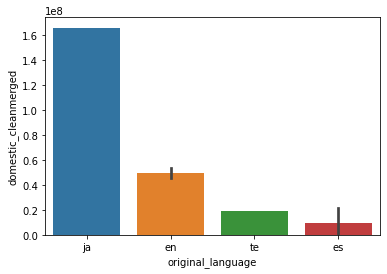

In [170]:
sns.barplot(data = merged, x = 'original_language', y = 'domestic_cleanmerged', order=jjj.index)

<AxesSubplot:xlabel='domestic_cleanmerged', ylabel='vote_count'>

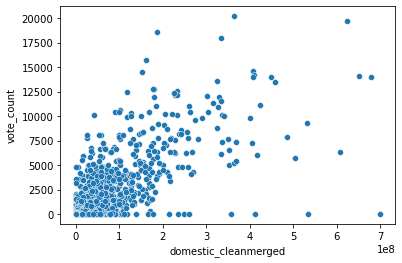

In [176]:
sns.scatterplot(data = merged, x = 'domestic_cleanmerged', y = 'vote_count')

In [178]:
import numpy as np

x = merged['domestic_cleanmerged']
y = merged['vote_count']

np.corrcoef(x,y)

array([[1.        , 0.72516568],
       [0.72516568, 1.        ]])

In [193]:
jjjj = merged.groupby('original_language').mean()['vote_count'].sort_values(ascending=False).head()

In [195]:
average_vote_count = merged['vote_count'].mean()
average_vote_count

1673.2401931200966

<AxesSubplot:xlabel='original_language', ylabel='vote_count'>

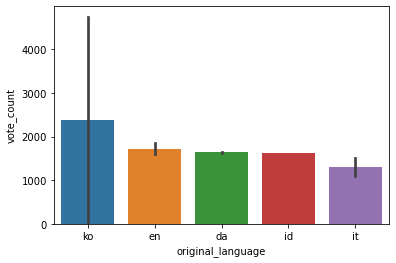

In [194]:
sns.barplot(data = merged, x = 'original_language', y = 'vote_count', order=jjjj.index)

In [ ]:
# rename the top five languages and add to a list

top_five_languages = ['English', 'French', 'Spanish', 'Russian', 'Japanese']

In [ ]:
# find the vote average for each language

english = tmdb_movies[tmdb_movies['original_language'] == 'en']['vote_average'].mean()
french = tmdb_movies[tmdb_movies['original_language'] == 'fr']['vote_average'].mean()
spanish = tmdb_movies[tmdb_movies['original_language'] == 'es']['vote_average'].mean()
russian = tmdb_movies[tmdb_movies['original_language'] == 'ru']['vote_average'].mean()
japanese = tmdb_movies[tmdb_movies['original_language'] == 'ja']['vote_average'].mean()

average_vote_lang = [english, french, spanish, russian, japanese]
average_vote_lang

In [ ]:
# also look at the median vote average

med_english = tmdb_movies[tmdb_movies['original_language'] == 'en']['vote_average'].median()
med_french = tmdb_movies[tmdb_movies['original_language'] == 'fr']['vote_average'].median()
med_spanish = tmdb_movies[tmdb_movies['original_language'] == 'es']['vote_average'].median()
med_russian = tmdb_movies[tmdb_movies['original_language'] == 'ru']['vote_average'].median()
med_japanese = tmdb_movies[tmdb_movies['original_language'] == 'ja']['vote_average'].median()

median_vote_lang = [med_english, med_french, med_spanish, med_russian, med_japanese]
median_vote_lang

# it looks like both the median and mean show that japan has the highest vote average

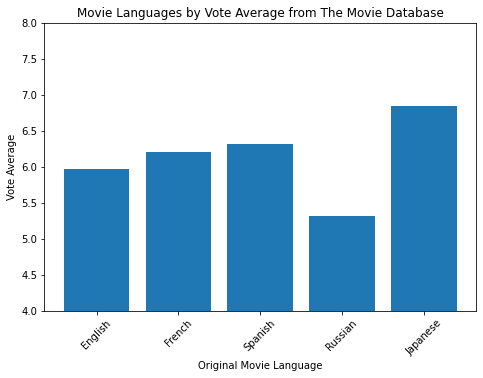

In [39]:
fig = plt.figure()

y = average_vote_lang
x = top_five_languages
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation = 45)
plt.ylim(4,8)
plt.xlabel('Original Movie Language')
plt.ylabel('Vote Average')
plt.title('Movie Languages by Vote Average from The Movie Database')
ax.bar(x,y)
plt.show()

# Data Analysis

The original hypthesis behind looking at the original languages in this sheet was that movies in English woudld have higher ratings because they will have have more votes. When looking at the data, we see that average ratings are higher for movies in Japanese and lower for those in Russian. I'd be curious to learn more about movies with high ratings in Japan and compare their box office results specifically. 

# Conclusions 

- Ensure that all movies that are produced are listed on highly used ratings websites like IMDB and Rotten Tomatoes so that potential viewers can both read and write reviews
- Consider running campaigns to get more viewers to leave reviews
- Start by producing movies that fall into the four highly rated genres surfaced in this report
- Microsoft should avoid producing movies in Russian while ramping up the production company

Next Steps:

- Dive deeper into movies that are produced in Japanese; why have they generated such high ratings?
- Explore data to surface experts that have produced movies highly rated movies in key highly rated genres 
- Consider allocating budget from other business units to engage with a consulting company to advise in the process of setting up a production company
